In [ ]:
### 1. What is Boosting in Machine Learning?  
Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to create a strong model. It works sequentially by training models in a way that each new model focuses on correcting the mistakes of the previous ones.

---

### 2. How does Boosting differ from Bagging?  
| **Feature**  | **Boosting**  | **Bagging**  |
|-------------|--------------|--------------|
| Model Training | Sequential | Parallel |
| Focus | Corrects mistakes of previous models | Reduces variance by averaging models |
| Model Type | Weak learners (e.g., small trees) | Stronger models (e.g., full trees) |
| Example Algorithms | AdaBoost, Gradient Boosting, XGBoost | Random Forest, Bootstrap Aggregation |

Boosting reduces bias, while bagging reduces variance.

---

### 3. What is the key idea behind AdaBoost?  
The key idea behind **AdaBoost (Adaptive Boosting)** is to train multiple weak classifiers sequentially, assigning higher weights to misclassified instances so that the next classifier focuses on them.

---

### 4. Explain the working of AdaBoost with an example.  
1. Assign equal weights to all data points.  
2. Train a weak classifier (e.g., a small decision tree).  
3. Increase the weights of misclassified samples.  
4. Train a new classifier on the updated dataset.  
5. Repeat the process for multiple iterations.  
6. Combine all classifiers using a weighted sum for the final prediction.

Example:  
- Suppose we classify spam emails. The first weak learner classifies 80% correctly but struggles with certain words.  
- The second model focuses more on these misclassified emails.  
- After multiple iterations, the final model combines all weak learners effectively.

---

### 5. What is Gradient Boosting, and how is it different from AdaBoost?  
**Gradient Boosting** is a boosting algorithm that optimizes a loss function by sequentially training models to correct errors using gradient descent. Unlike **AdaBoost**, which reweights data points, **Gradient Boosting** improves predictions by fitting new models to the residual errors.

---

### 6. What is the loss function in Gradient Boosting?  
The loss function in Gradient Boosting depends on the problem:  
- **Regression**: Mean Squared Error (MSE) or Mean Absolute Error (MAE)  
- **Classification**: Log Loss (for binary classification) or Cross-Entropy Loss  

Gradient Boosting minimizes the gradient of this loss function iteratively.

---

### 7. How does XGBoost improve over traditional Gradient Boosting?  
XGBoost (Extreme Gradient Boosting) improves traditional Gradient Boosting by:  
- **Regularization (L1 & L2)** to reduce overfitting  
- **Tree pruning** using a depth-wise approach  
- **Handling missing values** automatically  
- **Parallel processing** for faster computation  
- **Optimized memory usage**  

---

### 8. What is the difference between XGBoost and CatBoost?  
| **Feature**  | **XGBoost**  | **CatBoost**  |
|-------------|-------------|-------------|
| Best for | Numerical & structured data | Categorical data |
| Categorical Handling | Requires encoding (one-hot, label) | Handles categorical features natively |
| Training Speed | Fast | Faster for categorical data |
| Overfitting Handling | L1, L2 regularization | Ordered boosting avoids target leakage |

---

### 9. What are some real-world applications of Boosting techniques?  
- **Finance**: Fraud detection, credit scoring  
- **Healthcare**: Disease prediction, medical image analysis  
- **Marketing**: Customer churn prediction, recommendation systems  
- **Cybersecurity**: Malware detection  
- **E-commerce**: Product ranking, personalized recommendations  

---

### 10. How does regularization help in XGBoost?  
Regularization in XGBoost (L1 & L2 penalties) helps by:  
- **Reducing overfitting**  
- **Controlling tree complexity**  
- **Improving generalization**  

It ensures that trees don’t become too complex and memorize noise.

---

### 11. What are some hyperparameters to tune in Gradient Boosting models?  
- **Learning Rate (eta)**: Controls step size in gradient updates  
- **Number of Trees (n_estimators)**: More trees improve accuracy but increase overfitting risk  
- **Max Depth (max_depth)**: Controls tree complexity  
- **Subsample**: Fraction of data used for training each tree  
- **Colsample_bytree**: Fraction of features used per tree  

---

### 12. What is the concept of Feature Importance in Boosting?  
Feature Importance in Boosting refers to how much a feature contributes to predictions. It is calculated using:  
- **Gain**: Contribution of a feature to reducing loss  
- **Cover**: Number of samples using a feature  
- **Frequency**: How often a feature is used in trees  

It helps in feature selection and understanding model behavior.

---

### 13. Why is CatBoost efficient for categorical data?  
CatBoost is efficient for categorical data because:  
- It uses **Ordered Boosting** to avoid target leakage  
- Handles categorical features **natively** without needing encoding  
- Reduces overfitting in small datasets  
- Faster and more accurate for datasets with many categorical variables  


In [6]:
# Questions 14.	Train an AdaBoost Classifier on a sample dataset and print model accuracy 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier with DecisionTree as base estimator
adaboost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Train the model
adaboost_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 1.00


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [8]:
# Questions  15.	Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE) 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load the dataset (California Housing)
data = fetch_california_housing()
X, y = data.data, data.target  # Features and target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost Regressor with a Decision Tree base estimator
adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=50, random_state=42)

# Train the model
adaboost_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_reg.predict(X_test)

# Evaluate model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")



Mean Absolute Error (MAE): 0.79


In [10]:
# Questions 16.	Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance .
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and target labels

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print Feature Importance
feature_importance = pd.DataFrame({'Feature': data.feature_names, 'Importance': gb_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Model Accuracy: 0.96

Feature Importance:
                    Feature  Importance
7       mean concave points    0.450528
27     worst concave points    0.240103
20             worst radius    0.075589
22          worst perimeter    0.051408
21            worst texture    0.039886
23               worst area    0.038245
1              mean texture    0.027805
26          worst concavity    0.018725
16          concavity error    0.013068
13               area error    0.008415
10             radius error    0.006870
24         worst smoothness    0.004811
19  fractal dimension error    0.004224
11            texture error    0.003604
5          mean compactness    0.002996
15        compactness error    0.002511
4           mean smoothness    0.002467
17     concave points error    0.002038
28           worst symmetry    0.001478
12          perimeter error    0.001157
6            mean concavity    0.000922
18           symmetry error    0.000703
14         smoothness error    0.00055

In [12]:
# Questions 17. 	Train a Gradient Boosting Regressor and evaluate using R-Squared Score .

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target  # Features and target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_reg.predict(X_test)

# Evaluate model using R-Squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r2:.2f}")


R-Squared Score: 0.78


In [5]:
# Questions 18.	Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting .

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and target labels

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)

# Train an XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

# Print accuracy scores
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.2f}")
print(f"XGBoost Classifier Accuracy: {xgb_accuracy:.2f}")


Gradient Boosting Classifier Accuracy: 0.96
XGBoost Classifier Accuracy: 0.96


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:24:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [2]:
# Questions 19.	Train a CatBoost Classifier and evaluate using F1-Score .
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and target labels

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a CatBoost Classifier
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = cat_clf.predict(X_test)

# Evaluate using F1-Score
f1 = f1_score(y_test, y_pred)
print(f"CatBoost Classifier F1-Score: {f1:.2f}")


CatBoost Classifier F1-Score: 0.97


In [4]:
# Questions 20.	Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE) .

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target  # Features and target values

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_reg.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regressor Mean Squared Error (MSE): {mse:.2f}")


XGBoost Regressor Mean Squared Error (MSE): 0.30


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.88


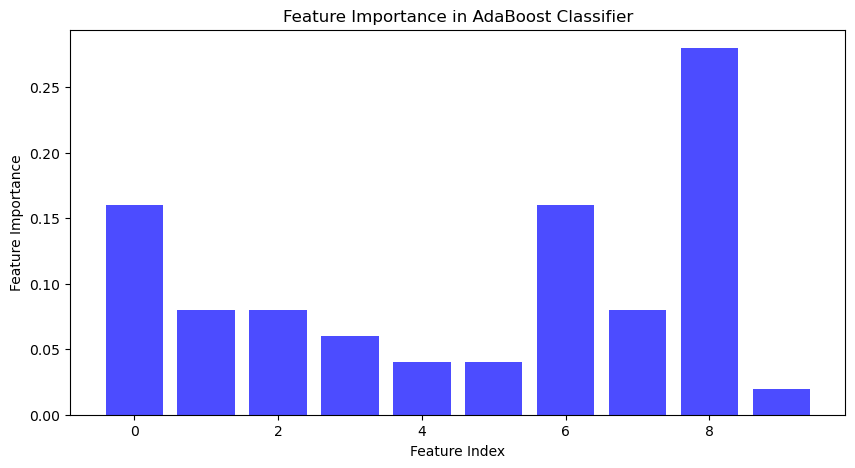

In [5]:
# Questions 21.	Train an AdaBoost Classifier and visualize feature importance .

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize AdaBoost Classifier with Decision Tree as base estimator
base_model = DecisionTreeClassifier(max_depth=1)  # Weak learner
adaboost = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Step 4: Train the AdaBoost model
adaboost.fit(X_train, y_train)

# Step 5: Make predictions and calculate accuracy
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 6: Get feature importance
feature_importance = adaboost.feature_importances_

# Step 7: Visualize feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), feature_importance, color='blue', alpha=0.7)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in AdaBoost Classifier")
plt.show()


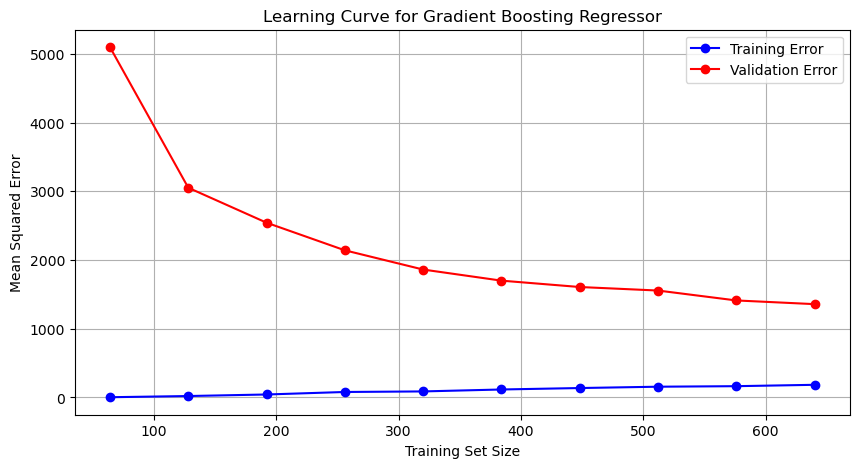

In [7]:
# Questions 22.	Train a Gradient Boosting Regressor and plot learning curves .

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error

# Step 1: Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 4: Train the Gradient Boosting Regressor
gbr.fit(X_train, y_train)

# Step 5: Compute training and validation errors at different training sizes
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive for meaningful comparison
train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

# Step 6: Plot Learning Curve
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_errors, 'o-', color='blue', label="Training Error")
plt.plot(train_sizes, test_errors, 'o-', color='red', label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Gradient Boosting Regressor")
plt.legend()
plt.grid()
plt.show()


Test Accuracy: 0.89


<Figure size 1000x500 with 0 Axes>

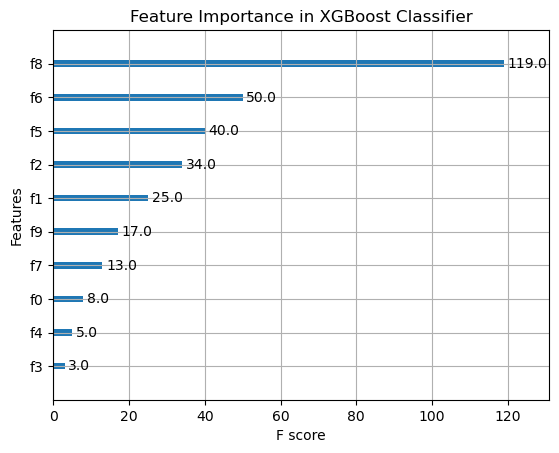

In [6]:
# Questions 23.	Train an XGBoost Classifier and visualize feature importance .
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

# Step 4: Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Step 5: Make predictions and calculate accuracy
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 6: Visualize Feature Importance
plt.figure(figsize=(10, 5))
plot_importance(xgb_classifier, importance_type='weight', max_num_features=10)
plt.title("Feature Importance in XGBoost Classifier")
plt.show()


Test Accuracy: 0.89


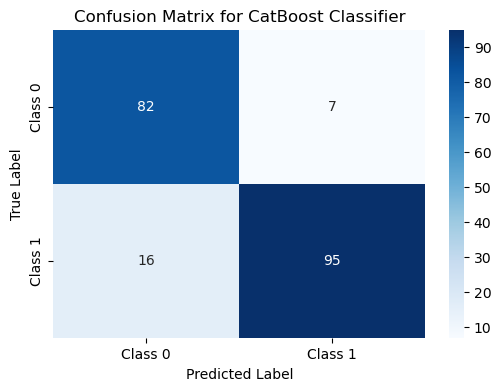

In [8]:
# Questions 24.	Train a CatBoost Classifier and plot the confusion matrix .
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize CatBoost Classifier (no need to specify categorical features here since it's synthetic data)
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Step 4: Train the CatBoost model
catboost_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = catboost_model.predict(X_test)

# Step 6: Compute accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

# Step 7: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CatBoost Classifier")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Estimators: 10 → Accuracy: 1.0000
Estimators: 50 → Accuracy: 1.0000
Estimators: 100 → Accuracy: 1.0000


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Estimators: 150 → Accuracy: 1.0000


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Estimators: 200 → Accuracy: 1.0000


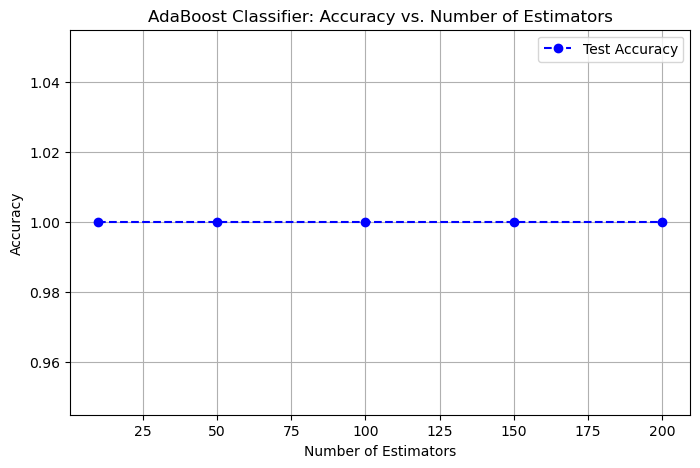

In [23]:
# Questions 25.	Train an AdaBoost Classifier with different numbers of estimators and compare accuracy .

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of estimators
estimators = [10, 50, 100, 150, 200]

# Store accuracy scores
accuracy_scores = []

for n in estimators:
    # Train AdaBoost classifier with DecisionTree
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # ✅ Fixed here
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    print(f"Estimators: {n} → Accuracy: {acc:.4f}")

# Plot accuracy vs. number of estimators
plt.figure(figsize=(8, 5))
plt.plot(estimators, accuracy_scores, marker='o', linestyle='--', color='b', label='Test Accuracy')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier: Accuracy vs. Number of Estimators")
plt.legend()
plt.grid()
plt.show()



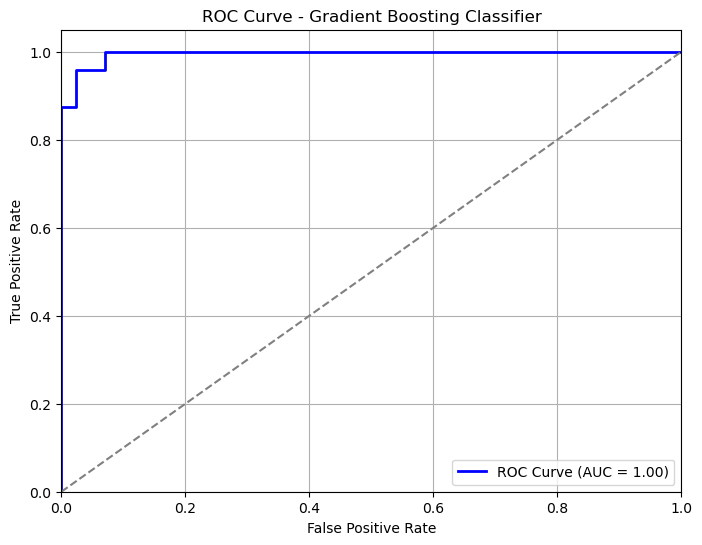

In [12]:
# Questions 26.	Train a Gradient Boosting Classifier and visualize the ROC curve .

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [14]:
# Questions 27.	Train an XGBoost Regressor and tune the learning rate using GridSearchCV .

import numpy as np
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Define parameter grid for tuning learning rate
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}

# Perform Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Learning Rate
best_lr = grid_search.best_params_['learning_rate']
print(f"Best Learning Rate: {best_lr}")

# Train final model with best learning rate
best_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=best_lr, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE of Best Model: {rmse:.4f}")


Best Learning Rate: 0.2
RMSE of Best Model: 0.4647


In [16]:
# Questions 28.	Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting .

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from collections import Counter

# Generate an imbalanced dataset
X, y = make_classification(n_samples=5000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution
print(f"Class Distribution: {Counter(y_train)}")

# Train CatBoost without class weights
model_no_weights = CatBoostClassifier(iterations=200, verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)

# Predict and evaluate
y_pred_no_weights = model_no_weights.predict(X_test)
acc_no_weights = accuracy_score(y_test, y_pred_no_weights)
f1_no_weights = f1_score(y_test, y_pred_no_weights)

print(f"Without Class Weighting -> Accuracy: {acc_no_weights:.4f}, F1-score: {f1_no_weights:.4f}")

# Train CatBoost with class weights
class_weights = {0: 1, 1: 9}  # Adjusting weight ratio
model_with_weights = CatBoostClassifier(iterations=200, class_weights=class_weights, verbose=0, random_state=42)
model_with_weights.fit(X_train, y_train)

# Predict and evaluate
y_pred_with_weights = model_with_weights.predict(X_test)
acc_with_weights = accuracy_score(y_test, y_pred_with_weights)
f1_with_weights = f1_score(y_test, y_pred_with_weights)

print(f"With Class Weighting -> Accuracy: {acc_with_weights:.4f}, F1-score: {f1_with_weights:.4f}")


Class Distribution: Counter({0: 3578, 1: 422})
Without Class Weighting -> Accuracy: 0.9470, F1-score: 0.7254
With Class Weighting -> Accuracy: 0.9360, F1-score: 0.7168


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate: 0.001 -> Accuracy: 0.8760, F1-score: 0.8758


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate: 0.01 -> Accuracy: 0.8760, F1-score: 0.8758


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate: 0.1 -> Accuracy: 0.8760, F1-score: 0.8758


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate: 0.5 -> Accuracy: 0.8880, F1-score: 0.8852


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate: 1.0 -> Accuracy: 0.8870, F1-score: 0.8836


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate: 2.0 -> Accuracy: 0.1290, F1-score: 0.0955


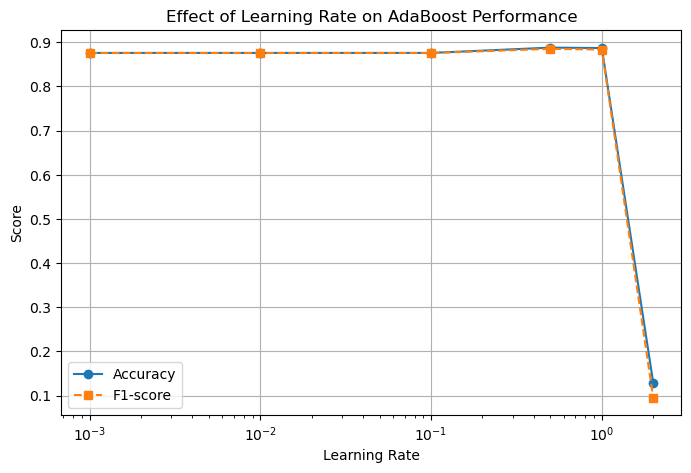

In [18]:
# Questions 29.	Train an AdaBoost Classifier and analyze the effect of different learning rates .

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Generate dataset
X, y = make_classification(n_samples=5000, n_features=10, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
accuracy_scores = []
f1_scores = []

# Train AdaBoost models with different learning rates
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracy_scores.append(acc)
    f1_scores.append(f1)
    print(f"Learning Rate: {lr} -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# Plot performance
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracy_scores, marker='o', label='Accuracy')
plt.plot(learning_rates, f1_scores, marker='s', label='F1-score', linestyle='dashed')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Effect of Learning Rate on AdaBoost Performance')
plt.legend()
plt.xscale('log')  # Log scale for better visualization
plt.grid()
plt.show()


Log-Loss: 0.0886
Accuracy: 0.9694


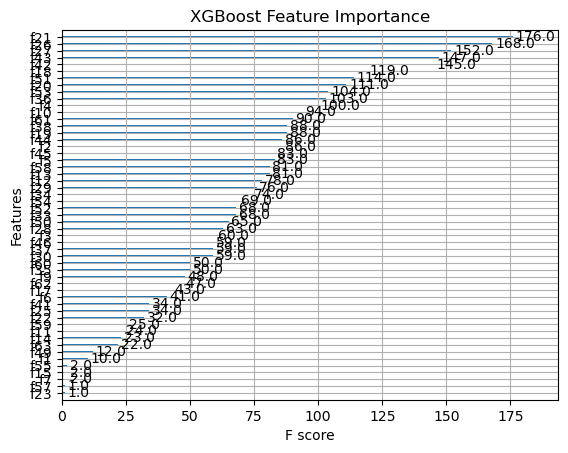

In [20]:
# Questions 30	Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target  # Multi-class labels

# Encode labels (not necessary for this dataset, but good practice)
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost model
model = xgb.XGBClassifier(objective="multi:softprob", num_class=len(np.unique(y)), eval_metric="mlogloss", random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)

# Compute Log-Loss
log_loss_value = log_loss(y_test, y_pred_proba)
print(f"Log-Loss: {log_loss_value:.4f}")

# Compute Accuracy
y_pred = np.argmax(y_pred_proba, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Feature Importance Plot
xgb.plot_importance(model, importance_type="weight", title="XGBoost Feature Importance")
plt.show()
